In [1]:
# IBM cloud deployment

Team ID - PNT2022TMID<br>
Project Name - A Novel Method for Handwritten Digit Recognition System

# Importing the required libraries

In [2]:
!pip install keras
!pip install tensorflow

In [3]:
pwd

'C:\\Users\\sr425\\Downloads\\IBM-Project-29521-1660126560-main\\IBM-Project-29521-1660126560-main\\Project Development Phase\\Sprint 4'

In [4]:
import tensorflow as tf                             
from matplotlib import pyplot as plt                        
import numpy as np

# Load data

In [5]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

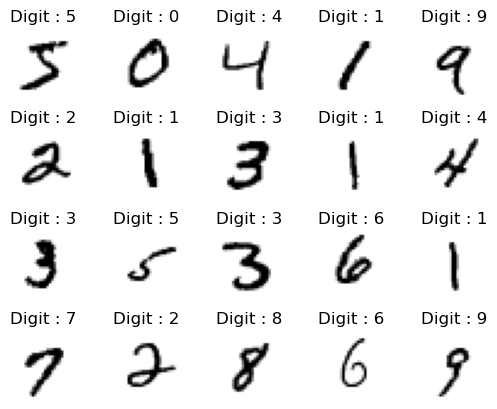

In [6]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [7]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [8]:
print('How image looks like : ')
print(train_img[0])

How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

Text(0.5, 0, 'Intensity')

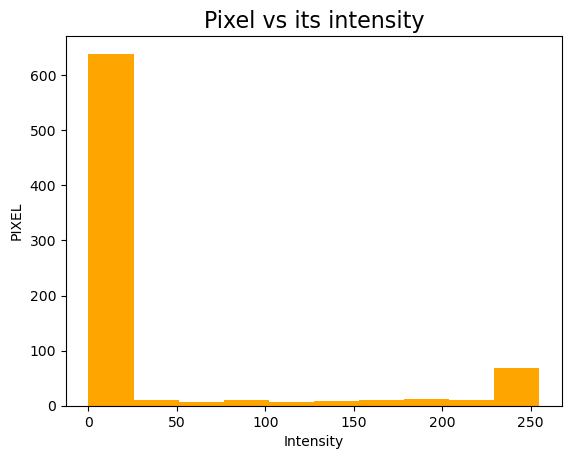

In [9]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [10]:
train_img=train_img/255.0
test_img=test_img/255.0

In [11]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

# Reshaping Dataset

Text(0.5, 0, 'Intensity')

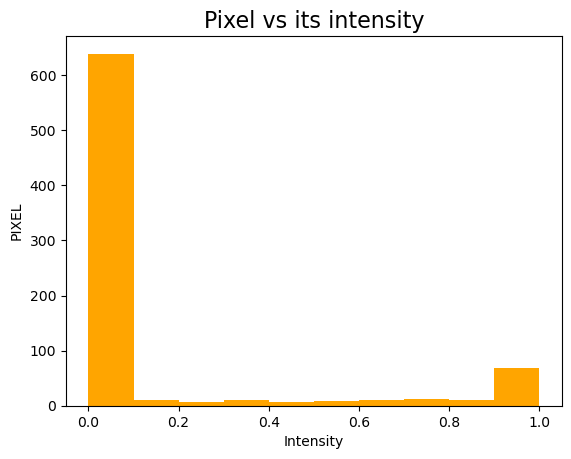

In [12]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

# Add CNN Layers

In [13]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

# Compiling the model

In [14]:
#compiling the sequential model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model

In [16]:
model.fit(train_img,train_lab,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0705 - accuracy: 0.9785
Epoch 2/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0516 - accuracy: 0.9841
Epoch 3/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0393 - accuracy: 0.9877
Epoch 4/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 5/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0297 - accuracy: 0.9902
Epoch 6/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0215 - accuracy: 0.9930
Epoch 7/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0220 - accuracy: 0.9932
Epoch 8/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0186 - accuracy: 0.9944


# Save The model

In [31]:
model.save('model.h5')

In [32]:
!tar -zcvf project.tgz project.h5

'tar' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
ls -1

 Volume in drive C is Windows
 Volume Serial Number is FE1D-7B2C

 Directory of C:\Users\sr425\Downloads\IBM-Project-29521-1660126560-main\IBM-Project-29521-1660126560-main\Project Development Phase\Sprint 4



File Not Found


In [34]:
!pip install watson-machine-learning-client --upgrade

     ------------------------------------ 538.9/538.9 kB 235.0 kB/s eta 0:00:00


# Cloud Deployment

In [37]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":""
}

client = APIClient(wml_credentials)

`apikey` value cannot be ''. Pass a valid apikey for IAM token.


WMLClientError: `apikey` value cannot be ''. Pass a valid apikey for IAM token.

In [38]:
client = APIClient(wml_credentials)

`apikey` value cannot be ''. Pass a valid apikey for IAM token.


WMLClientError: `apikey` value cannot be ''. Pass a valid apikey for IAM token.

In [39]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [40]:
space_uid = guid_from_space_name(client, "handwritten-digit-recognition")
print("Space UID = " + space_uid)

NameError: name 'client' is not defined

In [41]:
client.set.default_space(space_uid)

NameError: name 'client' is not defined

In [42]:
client.software_specifications.list()

NameError: name 'client' is not defined

In [43]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

NameError: name 'client' is not defined

In [44]:
model_details = client.repository.store_model(model='project.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid}
                                             )

model_id = client.repository.get_model_uid(model_details)

NameError: name 'client' is not defined

In [45]:
model_id

NameError: name 'model_id' is not defined

In [46]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 3s - loss: 0.1114 - accuracy: 0.9787 - 3s/epoch - 9ms/step
Test Loss 0.1114020124077797
Test Accuracy 0.9786999821662903


313/313 [==============================] - 2s 5ms/step
Predicted Value:  7
Successful prediction


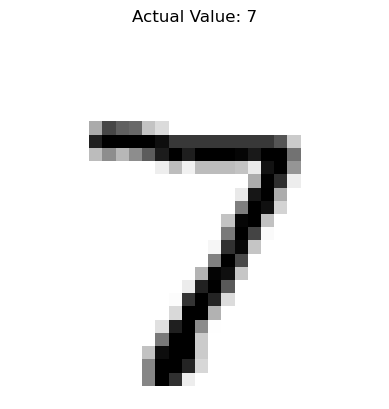

In [47]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 2s 8ms/step
Predicted Value:  2
Successful prediction


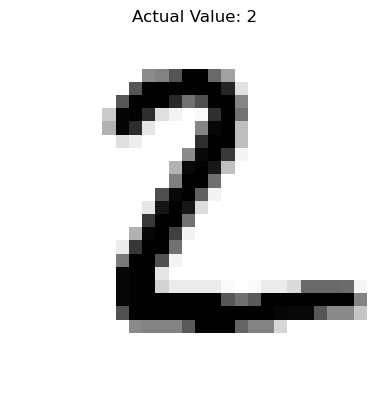

In [48]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 2s 5ms/step
Predicted Value:  1
Successful prediction


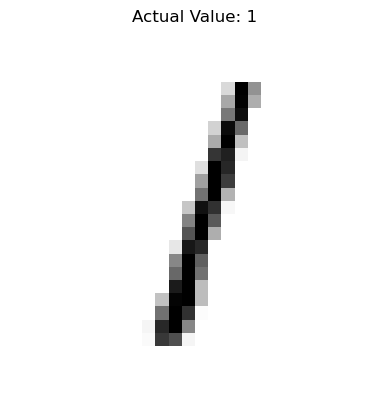

In [49]:
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [50]:
# make a prediction for a new image.
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
#from keras.models import load_model
from tensorflow.keras.utils import load_img
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [51]:
model=tf.keras.models.load_model('project.h5')      

In [52]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

NameError: name 'client' is not defined

In [ ]:
ls

# Test the model

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [ ]:
model = load_model("project.h5")

In [ ]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [ ]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [ ]:
img

In [ ]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [ ]:
pred = model.predict(im2arr)
print(pred)

In [ ]:
print(np.argmax(pred, axis=1)) #printing our Labels